In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gdabhishek/fertilizer-prediction")

print("Path to dataset files:", path)

100%|██████████| 1.27k/1.27k [00:00<00:00, 2.33MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gdabhishek/fertilizer-prediction/versions/1


In [ ]:
!pip install catboost
!pip install xgboost
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 38.7 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Interactivity
from ipywidgets import interact

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, Perceptron, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import (
    ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier,
    VotingClassifier, StackingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier,
    IsolationForest)  # IsolationForest added here
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# Additional Models
from sklearn.gaussian_process import GaussianProcessClassifier  # GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB  # GaussianNB
from sklearn.semi_supervised import LabelPropagation, LabelSpreading  # LabelPropagation, LabelSpreading

# External Classifiers
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Model Saving
import joblib
import pickle
import os
import zipfile

In [ ]:
df = pd.read_csv("/content/Fertilizer Prediction.csv")

In [ ]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [ ]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

<Axes: xlabel='Soil Type', ylabel='count'>

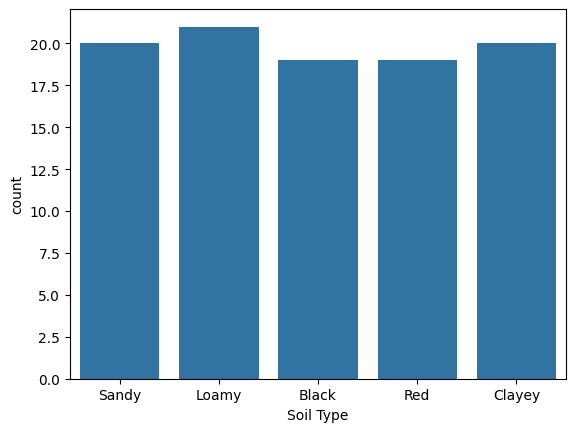

In [ ]:
sns.countplot(x='Soil Type', data = df)

<Axes: xlabel='Crop Type', ylabel='count'>

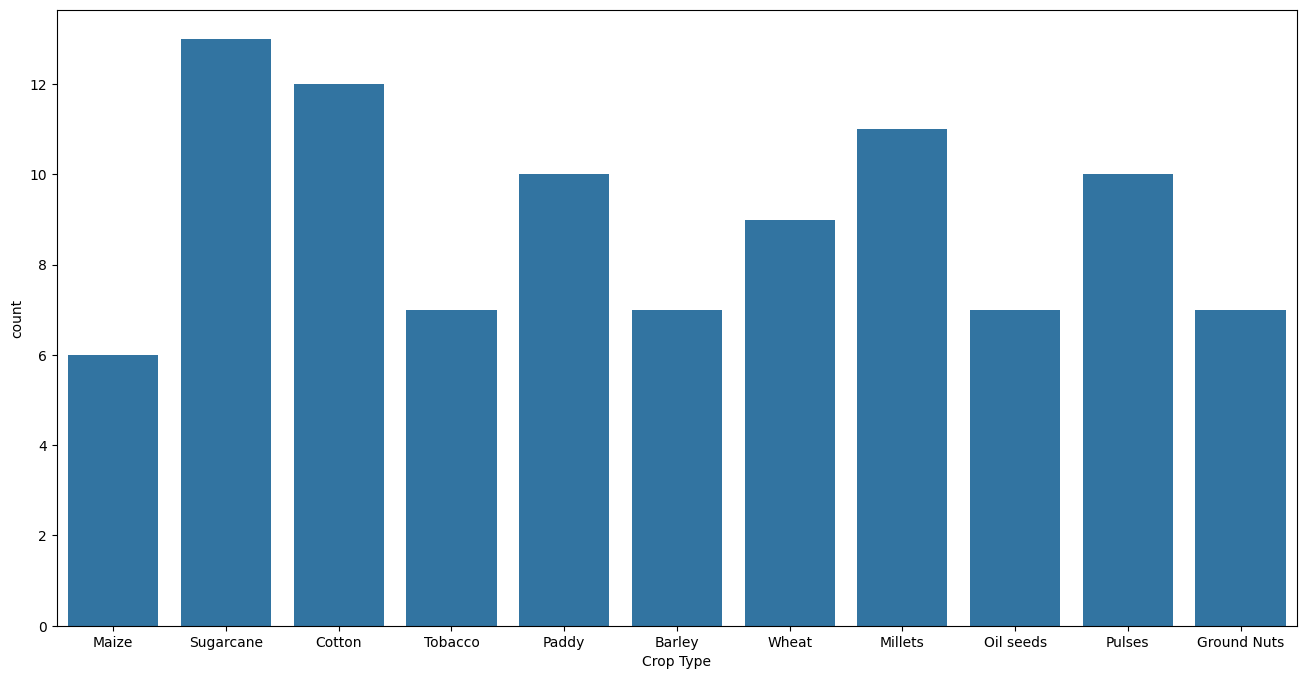

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x='Crop Type', data = df)

<Axes: xlabel='Fertilizer Name', ylabel='count'>

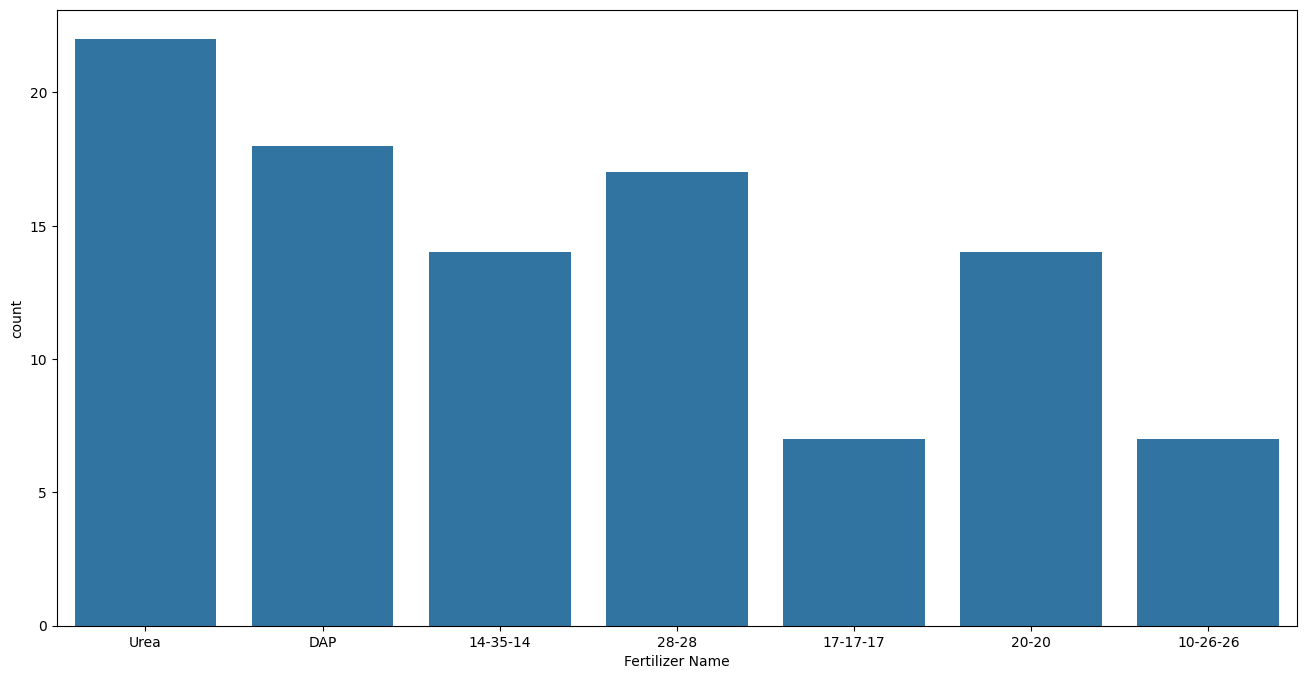

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Name', data = df)

In [ ]:
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df['Fertilizer Name'])

def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer Name'], ax=axes[1])

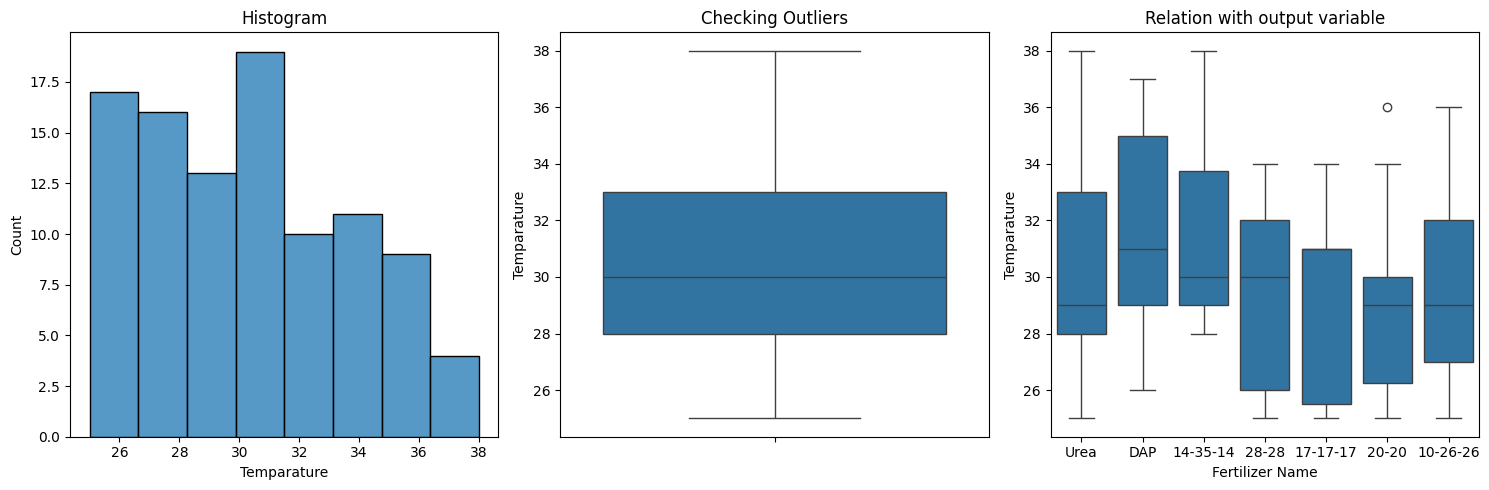

In [ ]:
plot_conti(df['Temparature'])

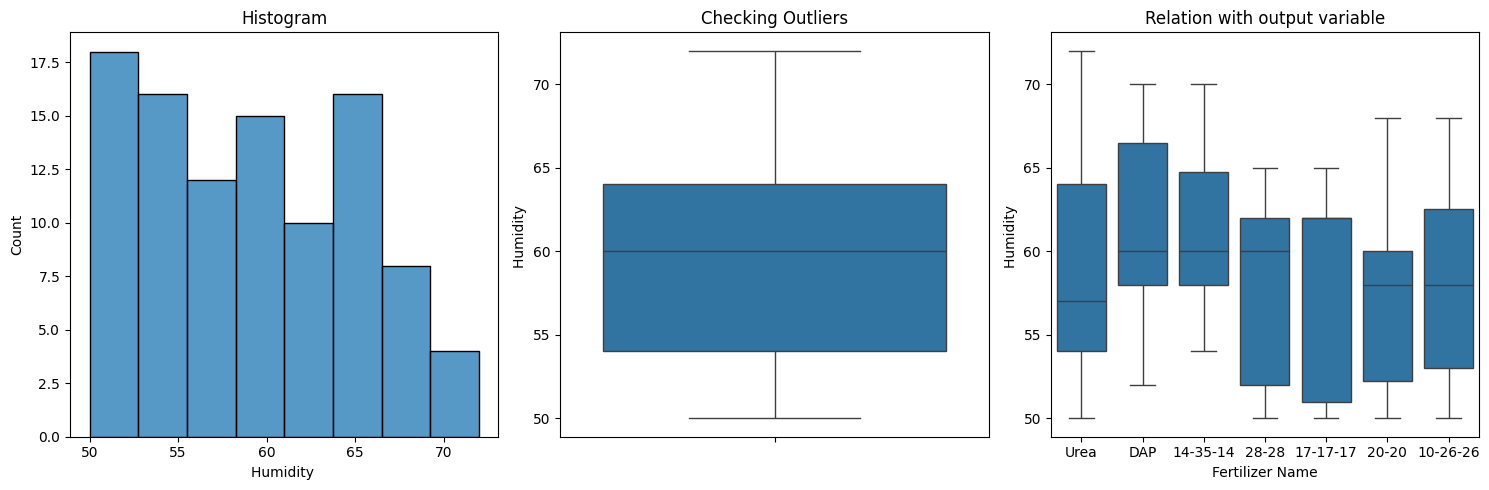

In [ ]:
plot_conti(df['Humidity '])

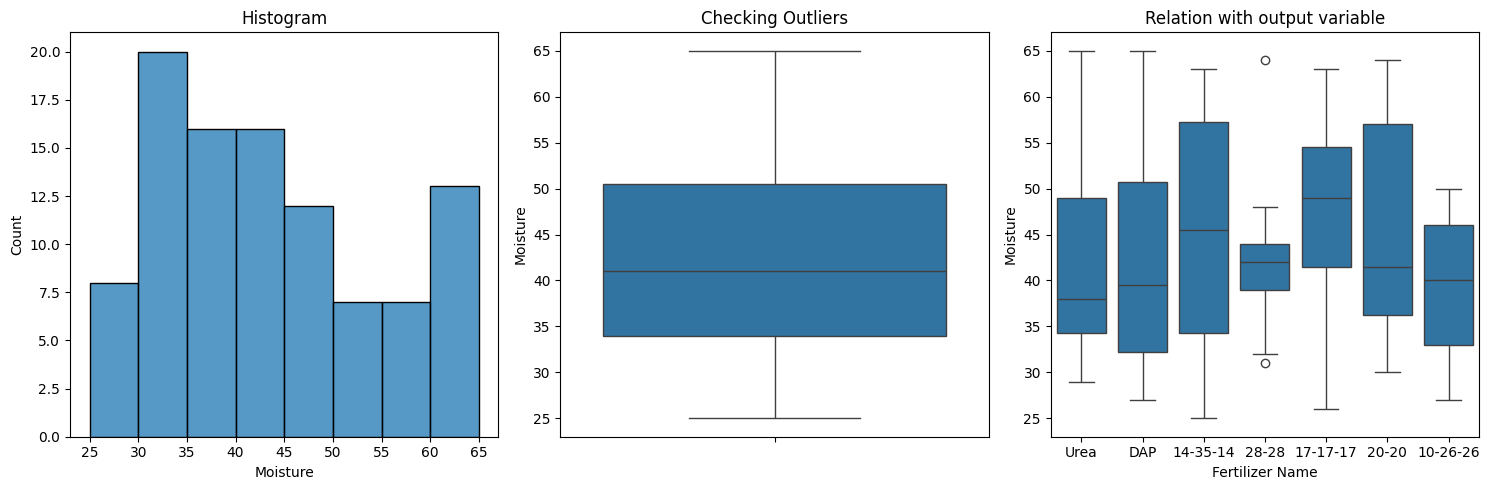

In [ ]:
plot_conti(df['Moisture'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

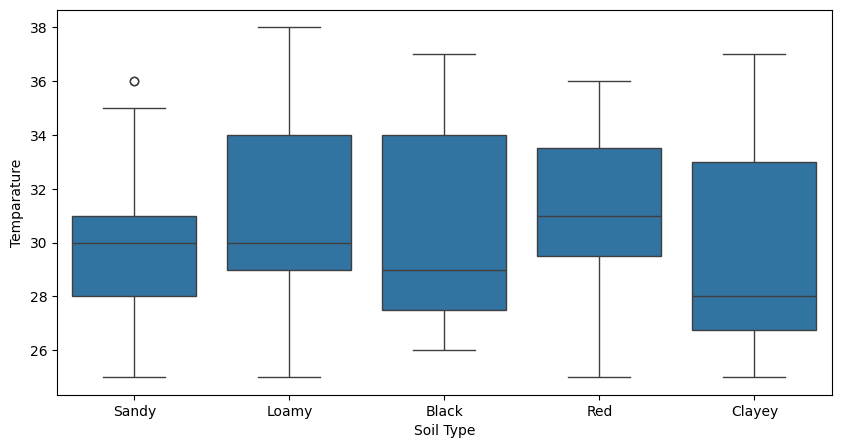

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

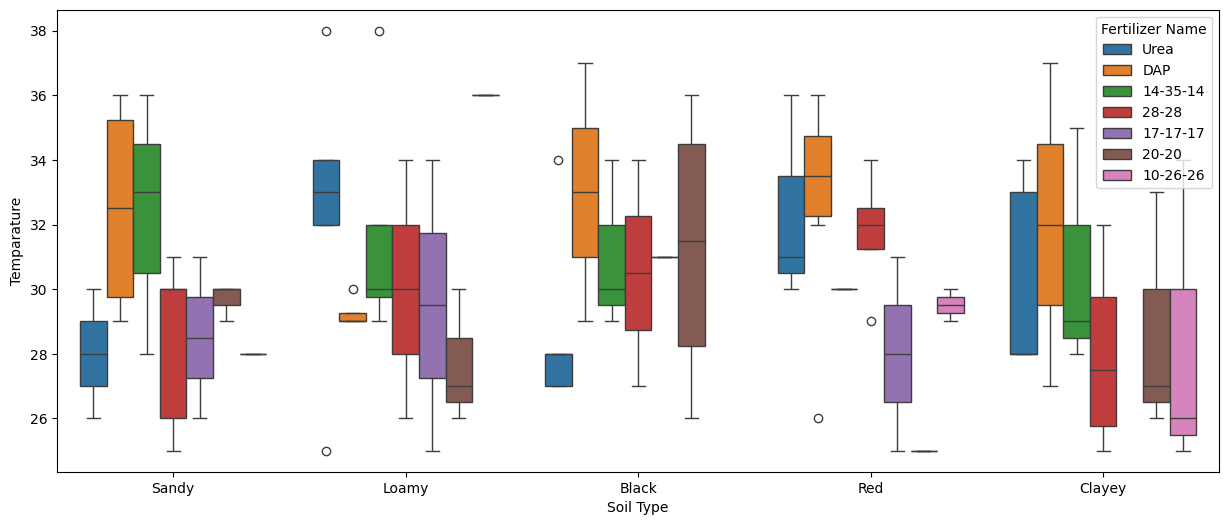

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'],hue=df['Fertilizer Name'])

<Axes: xlabel='Crop Type', ylabel='Temparature'>

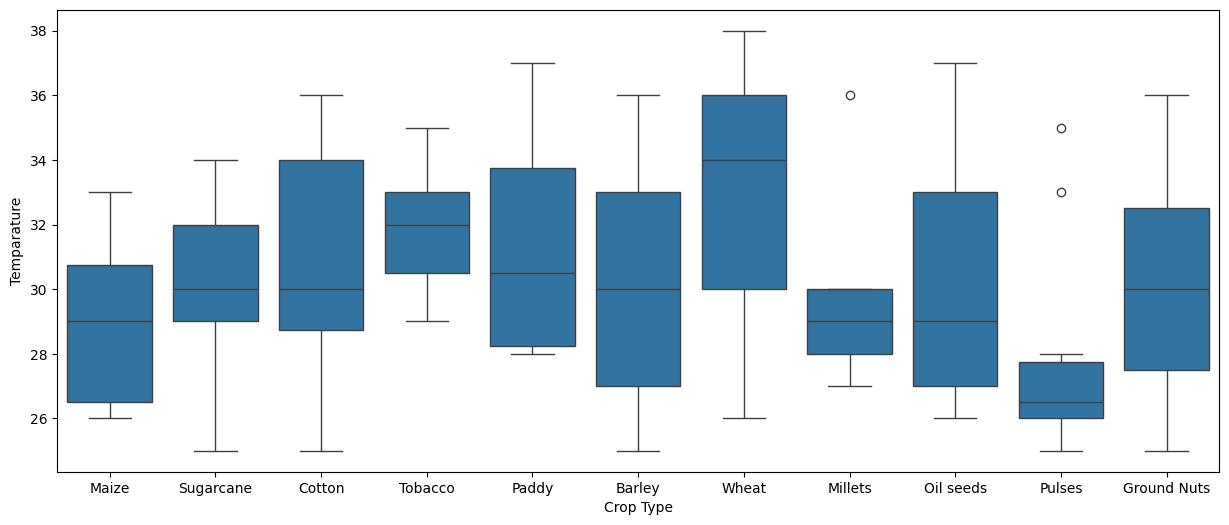

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Crop Type'],y=df['Temparature'])

<Axes: xlabel='Crop Type', ylabel='Humidity '>

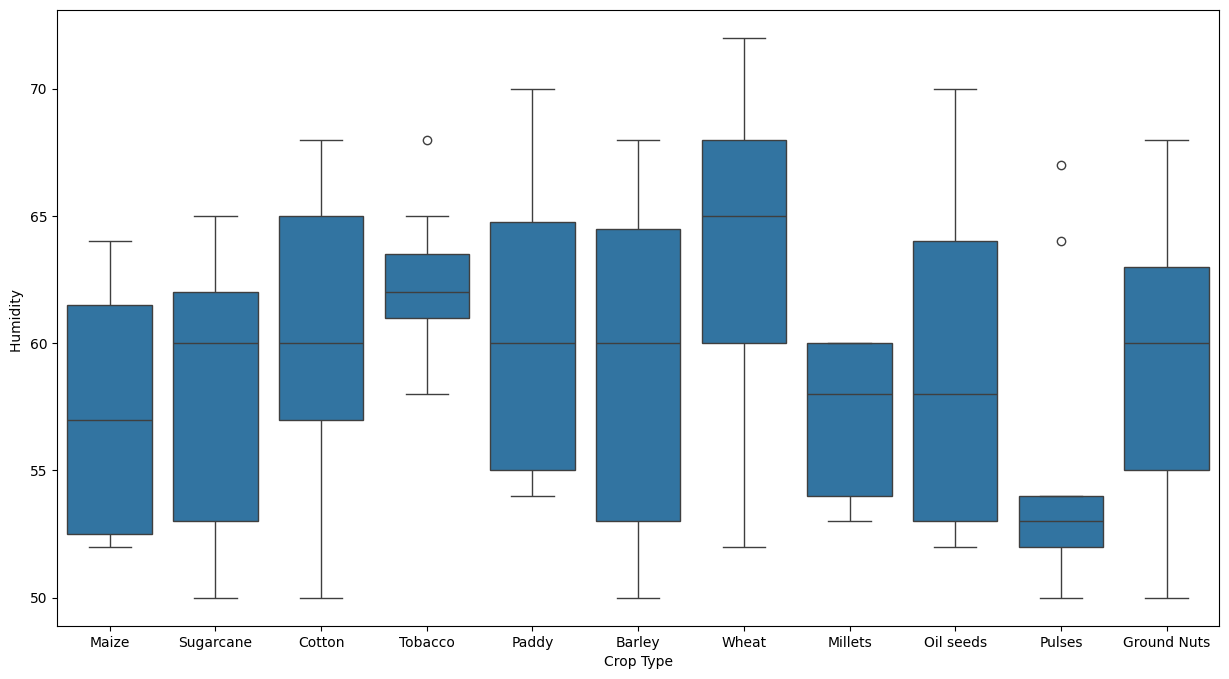

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Humidity '])

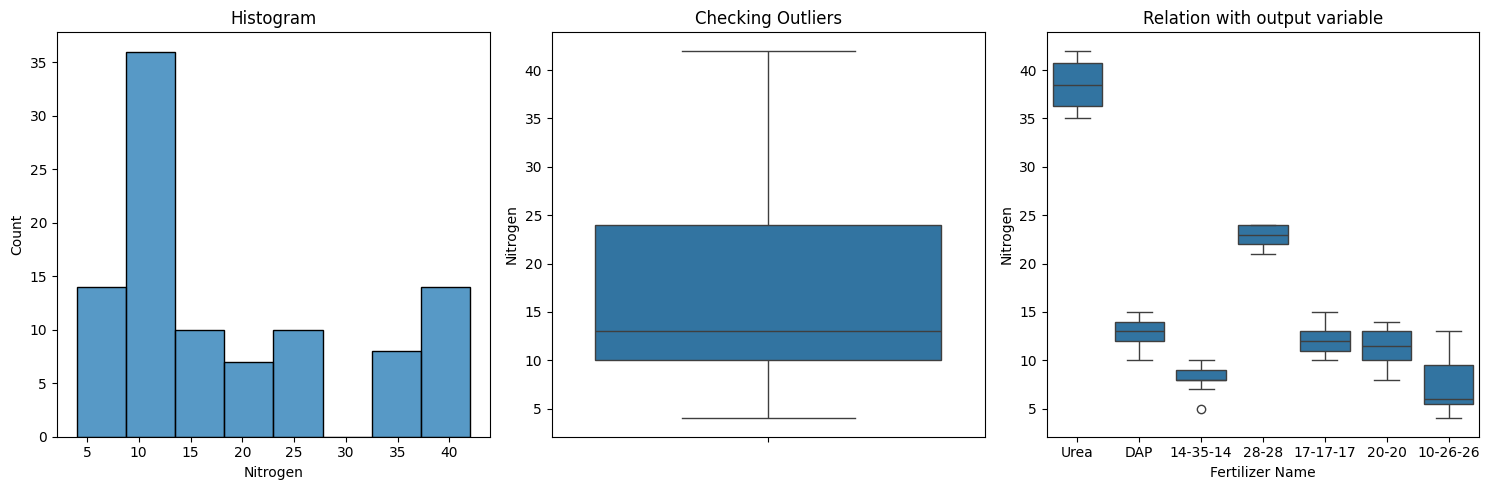

In [ ]:
plot_conti(df['Nitrogen'])

<Axes: xlabel='Crop Type', ylabel='Nitrogen'>

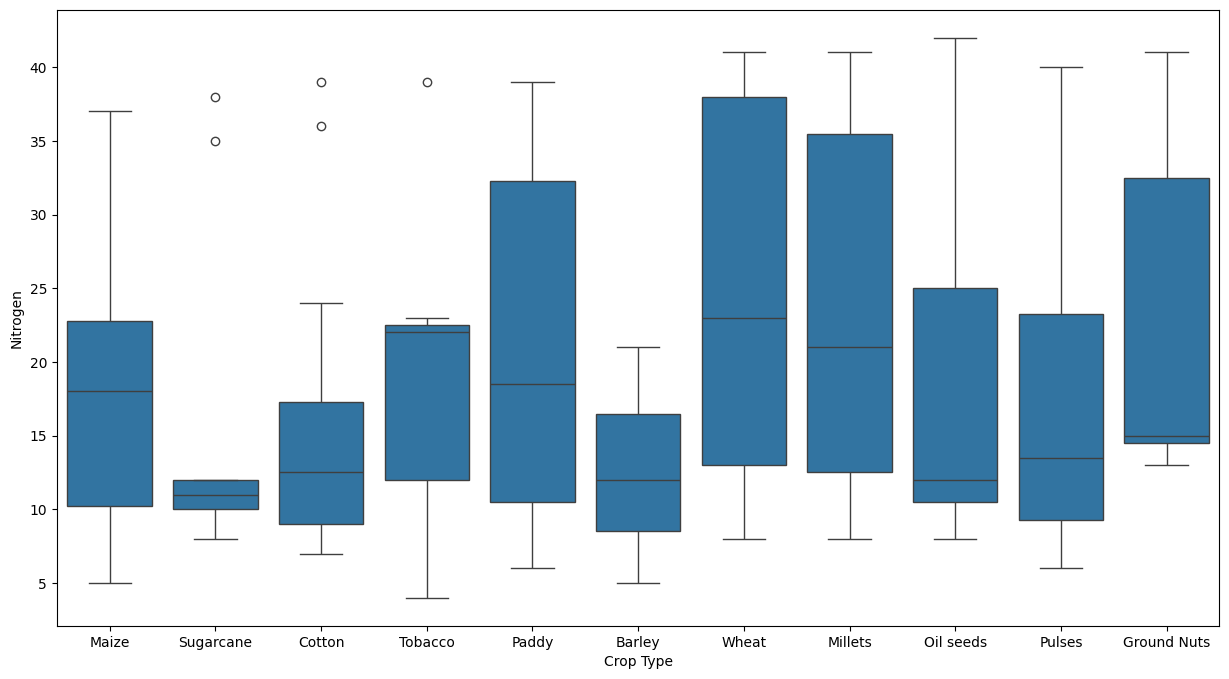

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Nitrogen'])

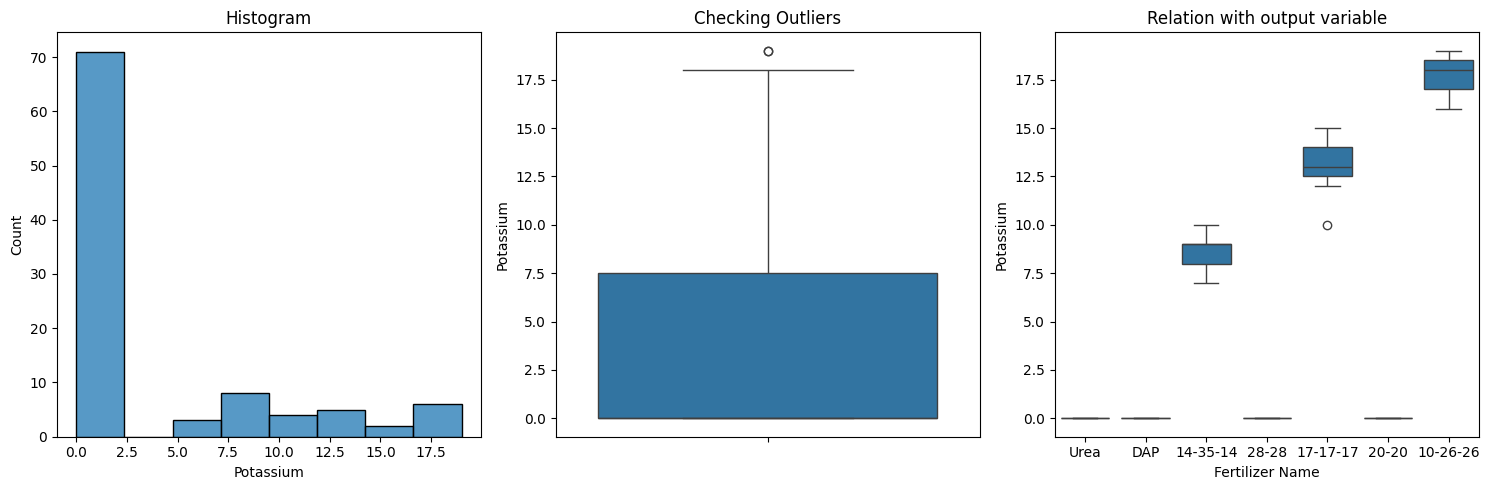

In [ ]:
plot_conti(df['Potassium'])

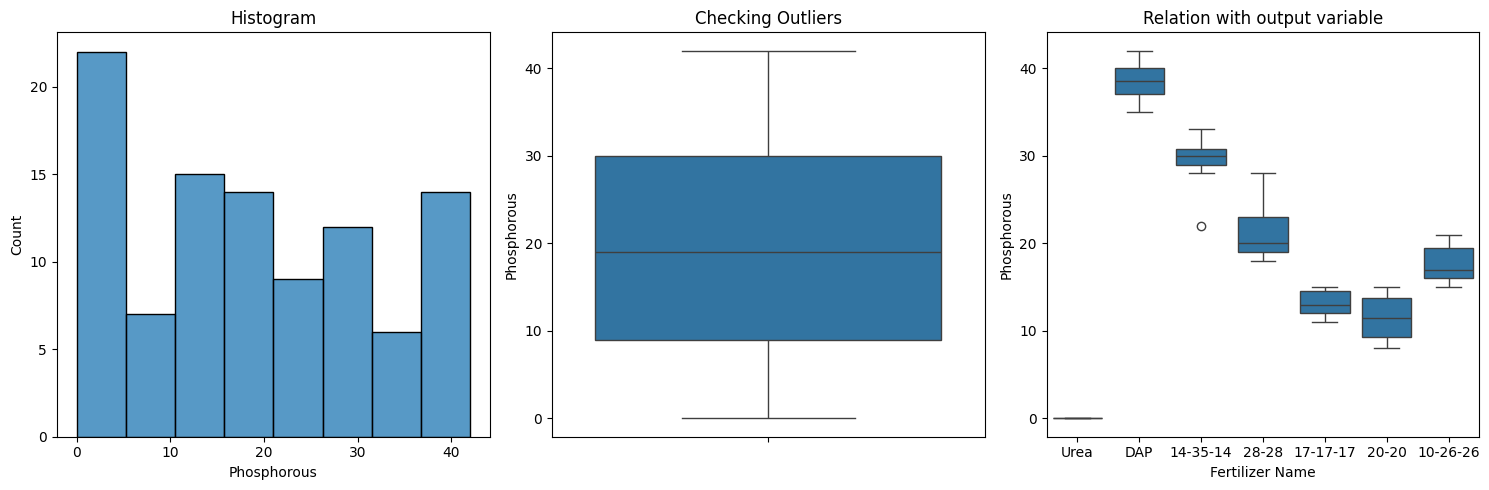

In [ ]:
plot_conti(df['Phosphorous'])

In [ ]:
y = df['Fertilizer Name'].copy()
X = df.drop('Fertilizer Name', axis=1).copy()

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X[0]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 26., 52., 38., 37.,  0.,  0.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[0]

array([-0.48412292, -0.50395263, -0.54321448, -0.48412292,  2.06559112,
       -0.25993762, -0.33567254, -0.31180478,  4.33012702, -0.38069349,
       -0.25993762, -0.33567254, -0.33567254, -0.42320737, -0.23094011,
       -0.33567254,  0.76462082,  0.80219471,  0.71373089, -1.15292671,
        0.91259936,  0.80677787])

In [ ]:
def evaluate_and_save_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} classification report")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    #sn.heatmap(cm, annot=True, fmt='d')
    sns.heatmap(cm, annot=True, cmap='Blues')
    #sns.heatmap(cm, annot = True, cmap = 'Wistia')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    # Save the model
    model_path = os.path.join('all_models', f'{model_name}_model.pkl')
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)

    return acc

ExtraTreesClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



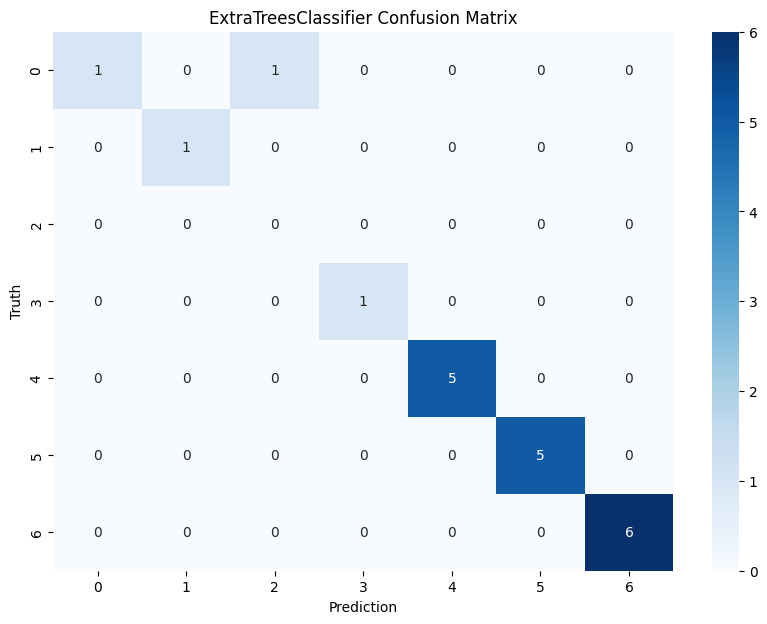

LinearDiscriminantAnalysis classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



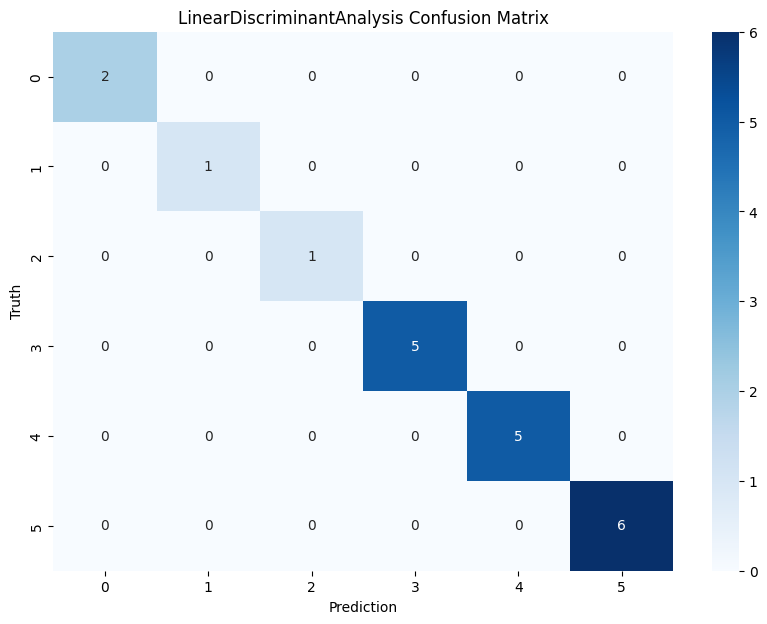

QuadraticDiscriminantAnalysis classification report
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.33      1.00      0.50         1
       28-28       0.00      0.00      0.00         5
         DAP       0.00      0.00      0.00         5
        Urea       0.11      0.17      0.13         6

    accuracy                           0.10        20
   macro avg       0.06      0.17      0.09        20
weighted avg       0.05      0.10      0.07        20



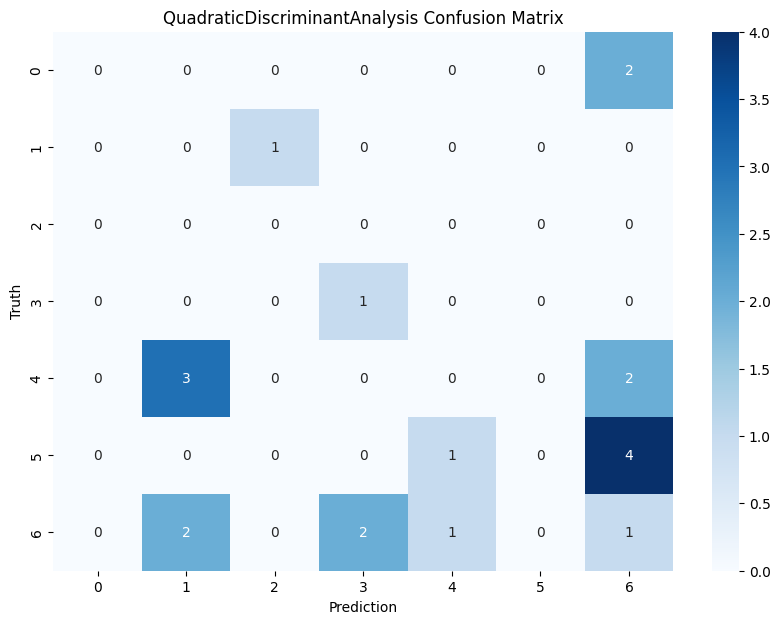

RidgeClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
       20-20       1.00      1.00      1.00         1
       28-28       0.75      0.60      0.67         5
         DAP       0.67      0.80      0.73         5
        Urea       0.86      1.00      0.92         6

    accuracy                           0.75        20
   macro avg       0.71      0.65      0.66        20
weighted avg       0.76      0.75      0.74        20



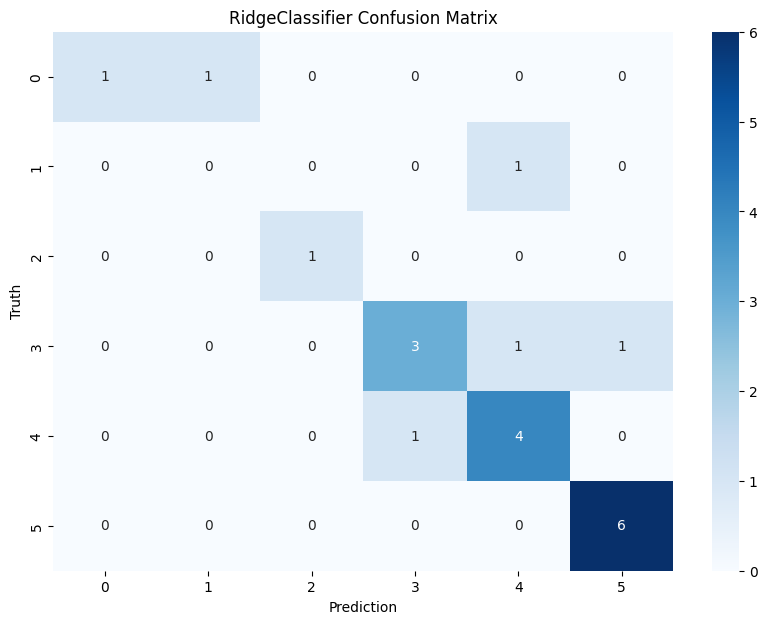

PassiveAggressiveClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       0.75      0.60      0.67         5
         DAP       0.83      1.00      0.91         5
        Urea       0.83      0.83      0.83         6

    accuracy                           0.80        20
   macro avg       0.63      0.63      0.63        20
weighted avg       0.80      0.80      0.79        20



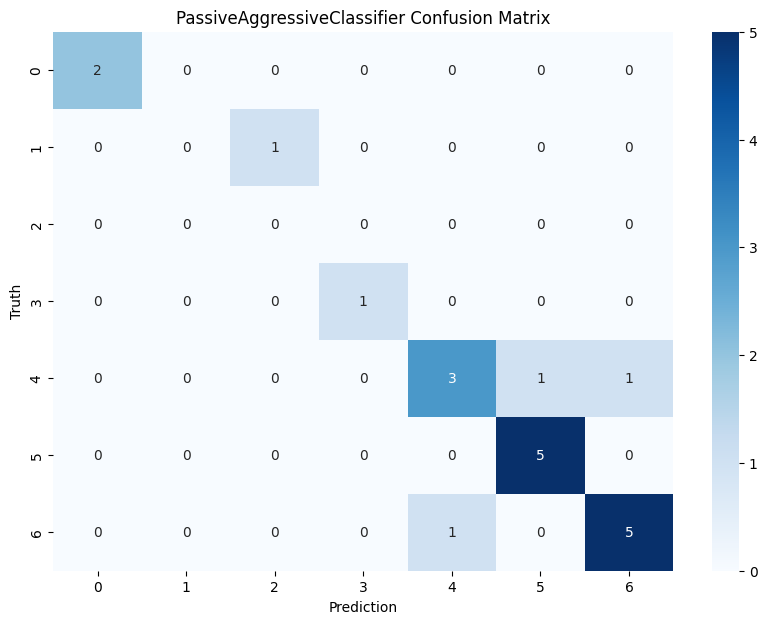

Perceptron classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       0.67      0.80      0.73         5
         DAP       0.80      0.80      0.80         5
        Urea       0.83      0.83      0.83         6

    accuracy                           0.75        20
   macro avg       0.61      0.56      0.58        20
weighted avg       0.77      0.75      0.75        20



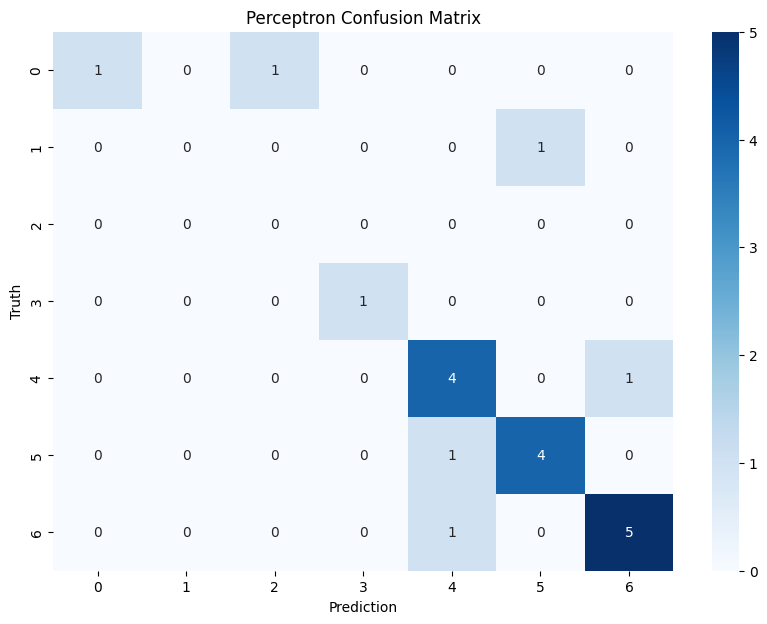

BaggingClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



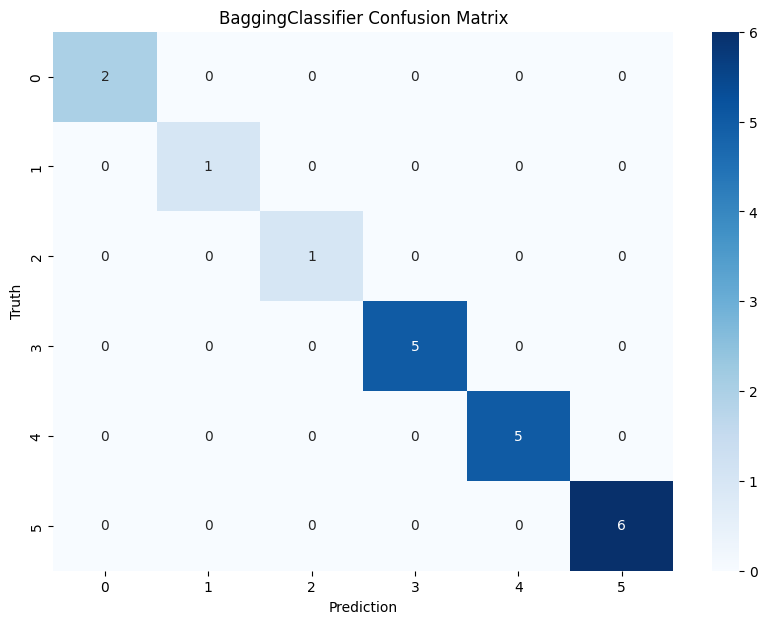

HistGradientBoostingClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



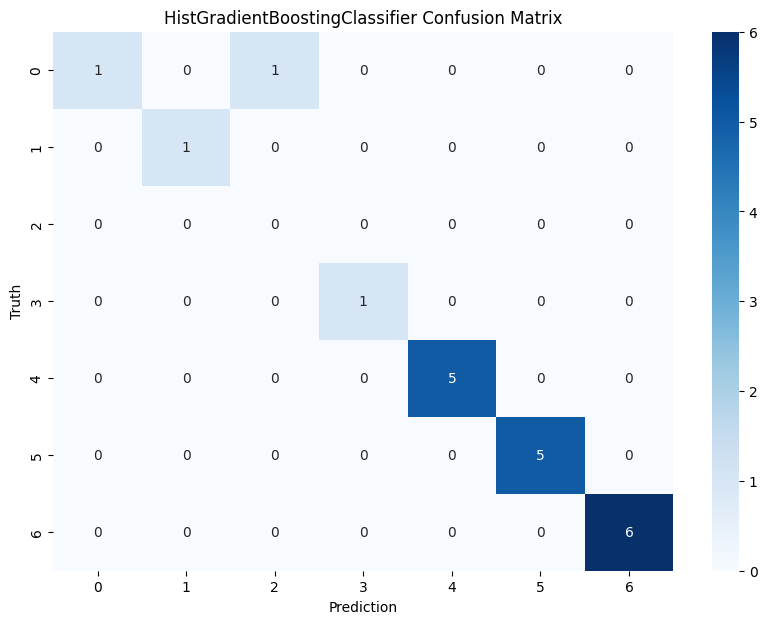

SGDClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       0.75      0.60      0.67         5
         DAP       0.67      0.80      0.73         5
        Urea       1.00      0.83      0.91         6

    accuracy                           0.70        20
   macro avg       0.63      0.53      0.57        20
weighted avg       0.80      0.70      0.74        20



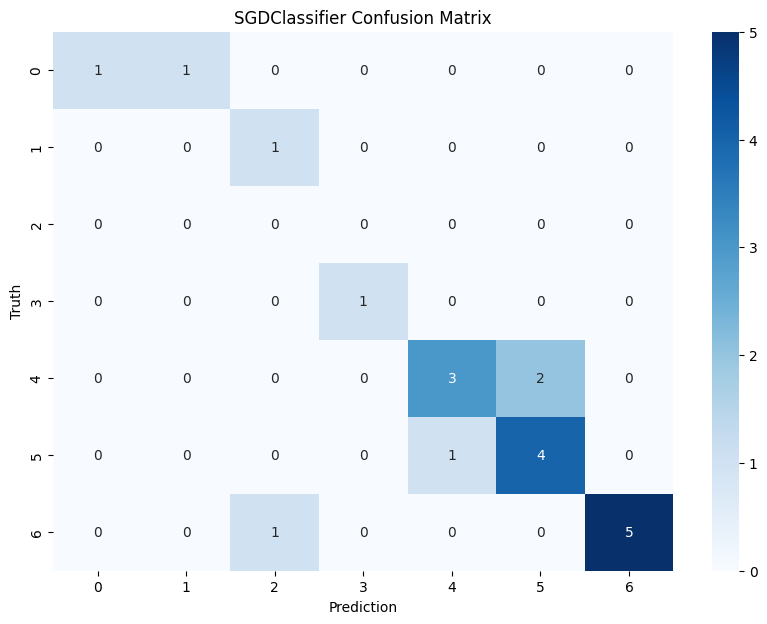

NearestCentroid classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
       20-20       0.00      0.00      0.00         1
       28-28       0.57      0.80      0.67         5
         DAP       0.60      0.60      0.60         5
        Urea       1.00      0.50      0.67         6

    accuracy                           0.55        20
   macro avg       0.53      0.40      0.43        20
weighted avg       0.69      0.55      0.58        20



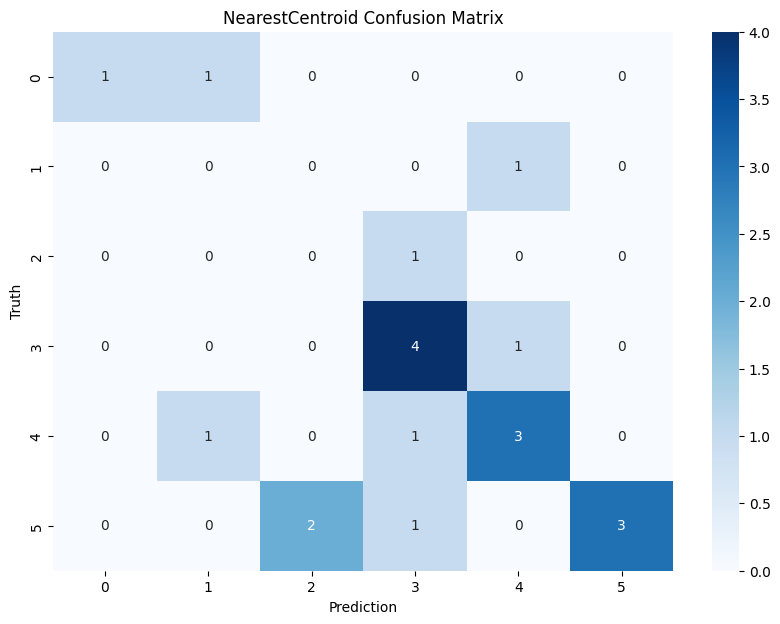

K-NeighborsClassifier classification report
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         2
    14-35-14       0.00      0.00      0.00         1
       20-20       0.00      0.00      0.00         1
       28-28       0.20      0.20      0.20         5
         DAP       0.00      0.00      0.00         5
        Urea       0.50      0.17      0.25         6

    accuracy                           0.10        20
   macro avg       0.12      0.06      0.07        20
weighted avg       0.20      0.10      0.12        20



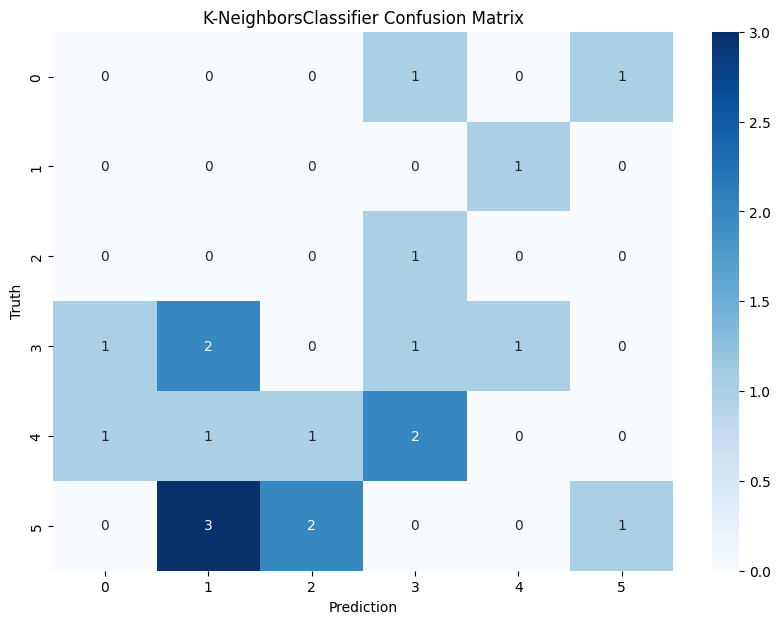

GradientBoostingClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       0.50      1.00      0.67         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      0.80      0.89         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.93        20
weighted avg       0.97      0.95      0.96        20



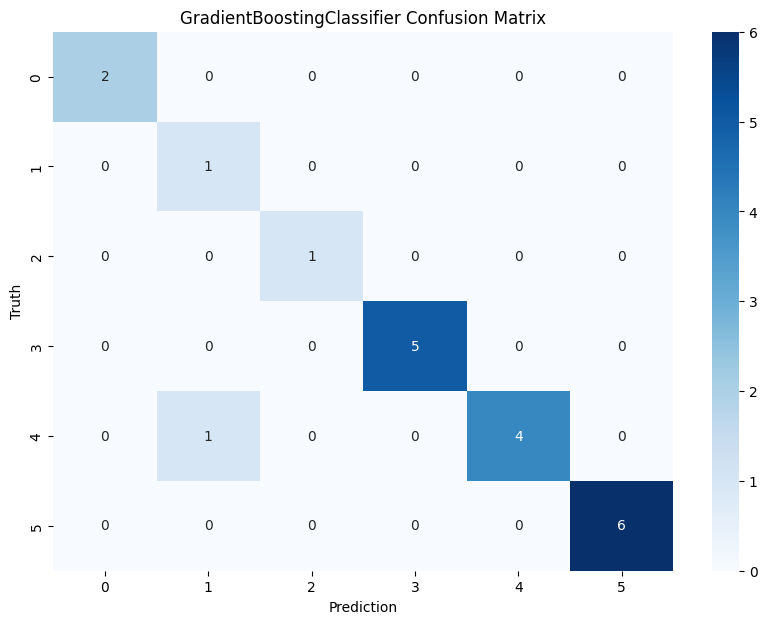

RandomForestClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



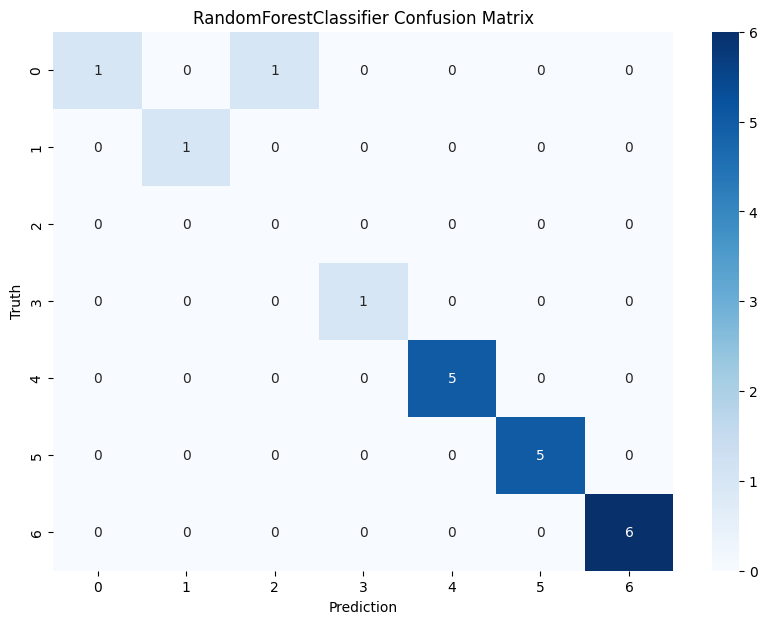

LogisticRegression classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       0.75      0.60      0.67         5
         DAP       0.80      0.80      0.80         5
        Urea       0.86      1.00      0.92         6

    accuracy                           0.75        20
   macro avg       0.63      0.56      0.58        20
weighted avg       0.79      0.75      0.76        20



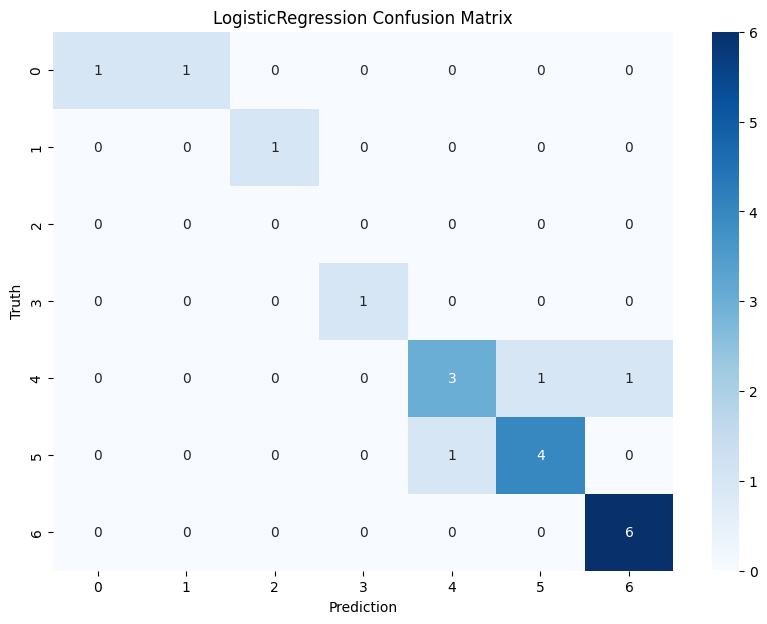

SupportVectorClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
       20-20       0.00      0.00      0.00         1
       28-28       0.20      0.20      0.20         5
         DAP       0.25      0.20      0.22         5
        Urea       1.00      0.33      0.50         6

    accuracy                           0.25        20
   macro avg       0.41      0.21      0.26        20
weighted avg       0.51      0.25      0.32        20



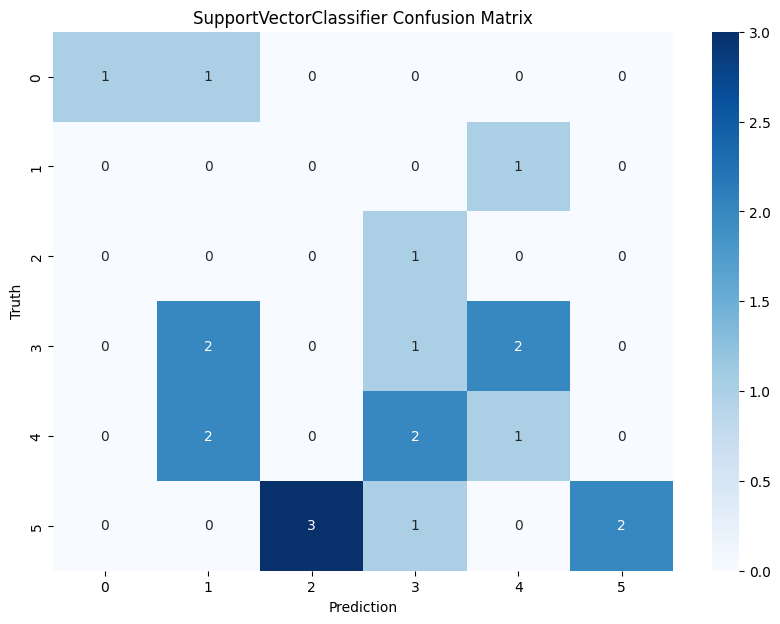

DecisionTreeClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



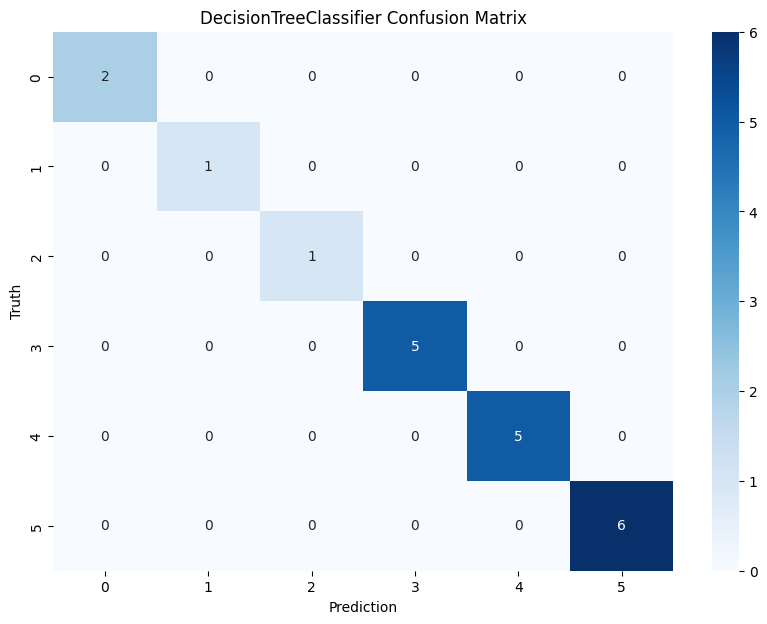

AdaBoostClassifier classification report
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         2
    14-35-14       0.11      1.00      0.20         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.00      0.00      0.00         1
       28-28       0.00      0.00      0.00         5
         DAP       0.00      0.00      0.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.35        20
   macro avg       0.16      0.29      0.17        20
weighted avg       0.31      0.35      0.31        20



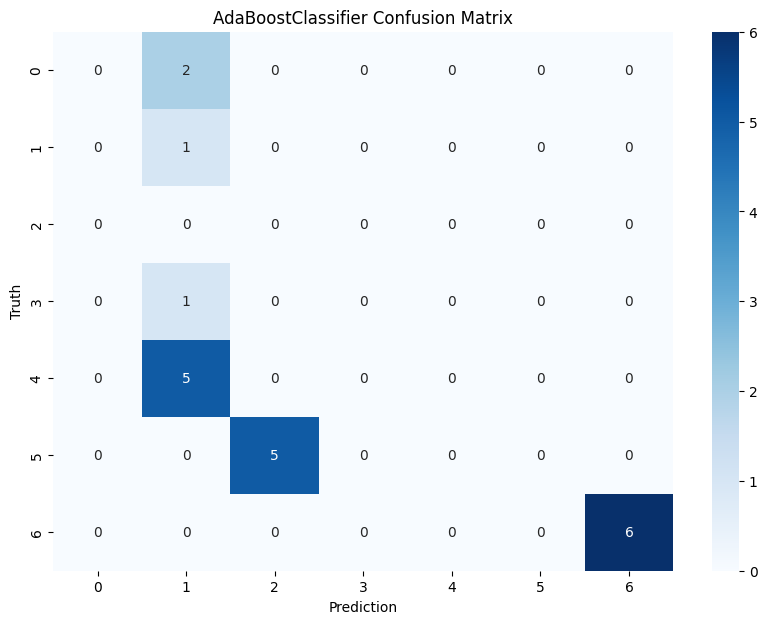

CatBoostClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



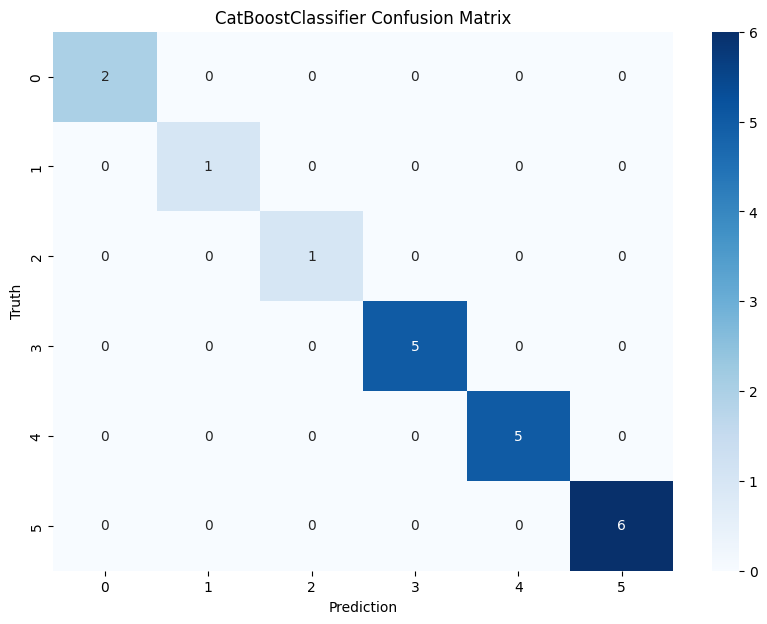

ExtraTreeClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.33      1.00      0.50         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.00      0.00      0.00         1
       28-28       0.57      0.80      0.67         5
         DAP       0.50      0.20      0.29         5
        Urea       0.80      0.67      0.73         6

    accuracy                           0.55        20
   macro avg       0.46      0.45      0.41        20
weighted avg       0.62      0.55      0.55        20



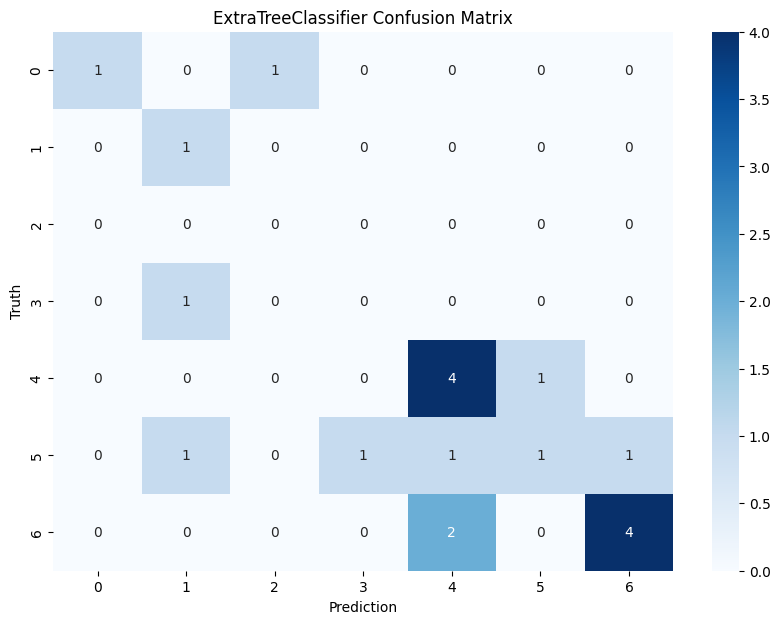

LabelPropagation classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.33      1.00      0.50         1
       28-28       0.50      0.60      0.55         5
         DAP       0.40      0.40      0.40         5
        Urea       1.00      0.17      0.29         6

    accuracy                           0.40        20
   macro avg       0.46      0.38      0.34        20
weighted avg       0.64      0.40      0.41        20



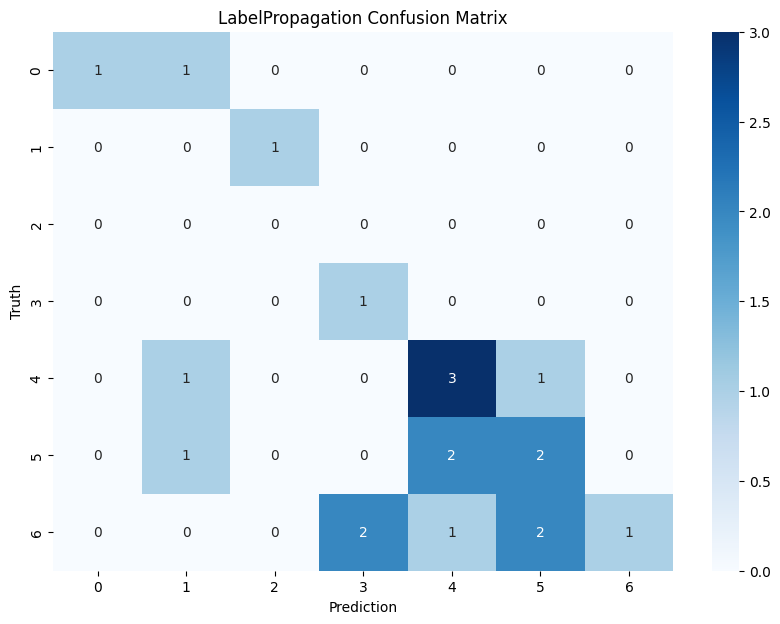

LabelSpreading classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.33      1.00      0.50         1
       28-28       0.50      0.60      0.55         5
         DAP       0.40      0.40      0.40         5
        Urea       1.00      0.17      0.29         6

    accuracy                           0.40        20
   macro avg       0.46      0.38      0.34        20
weighted avg       0.64      0.40      0.41        20



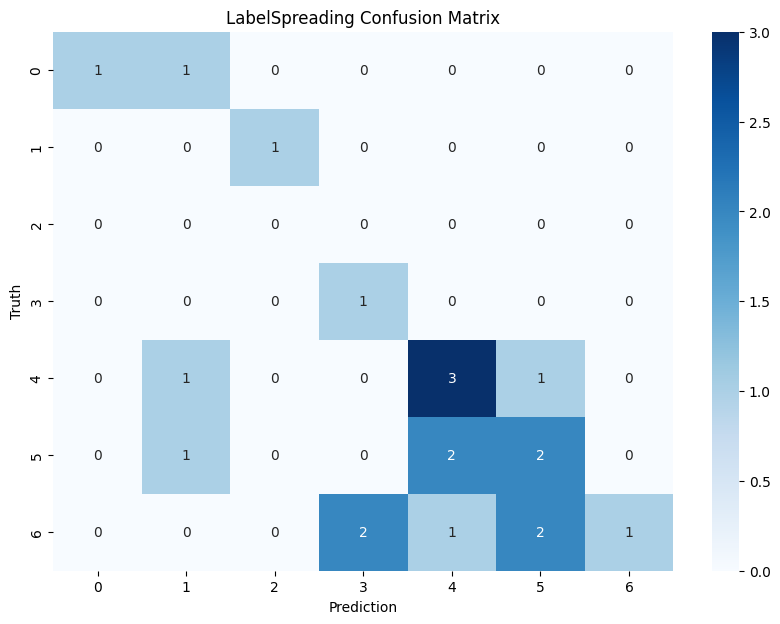

GaussianProcessClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.33      1.00      0.50         1
       28-28       0.50      0.60      0.55         5
         DAP       0.40      0.40      0.40         5
        Urea       1.00      0.17      0.29         6

    accuracy                           0.40        20
   macro avg       0.46      0.38      0.34        20
weighted avg       0.64      0.40      0.41        20



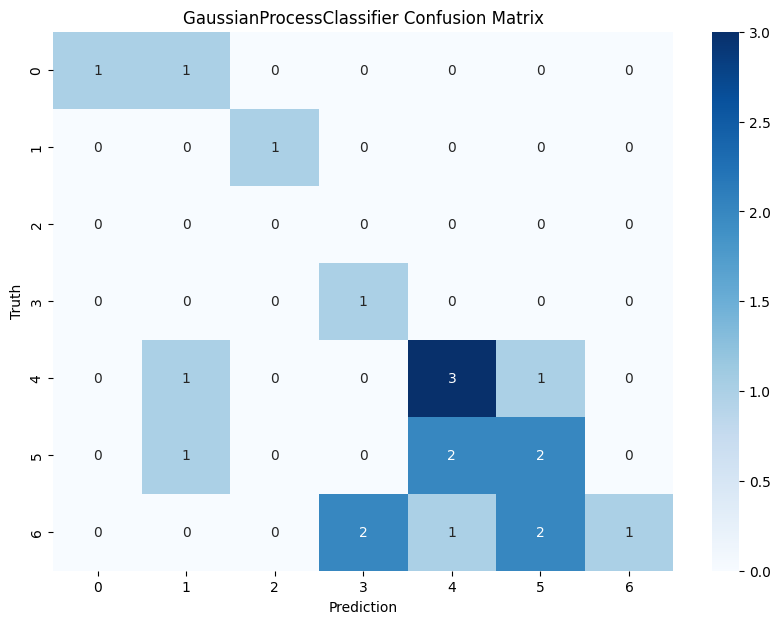

GaussianNB classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.17      1.00      0.29         1
       28-28       0.67      0.80      0.73         5
         DAP       1.00      0.60      0.75         5
        Urea       1.00      0.17      0.29         6

    accuracy                           0.50        20
   macro avg       0.55      0.44      0.39        20
weighted avg       0.82      0.50      0.54        20



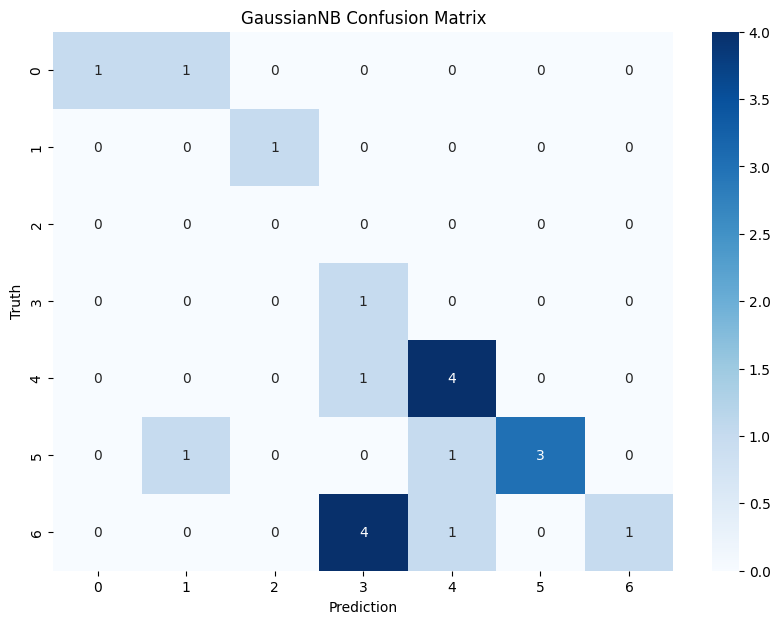

VotingClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.50      1.00      0.67         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      0.80      0.89         5
         DAP       0.83      1.00      0.91         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.89      0.88      0.86        20
weighted avg       0.93      0.90      0.90        20



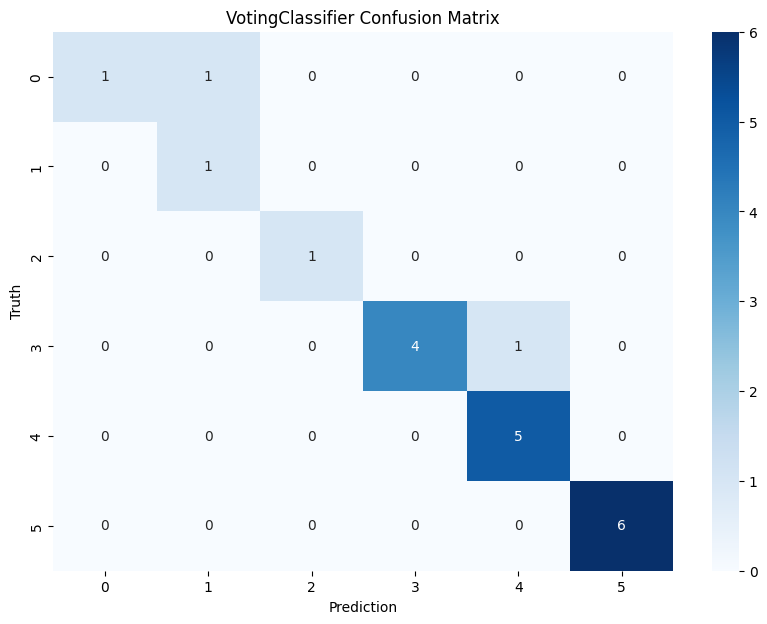

StackingClassifier classification report
              precision    recall  f1-score   support

    10-26-26       0.67      1.00      0.80         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       0.67      0.40      0.50         5
         DAP       0.67      0.80      0.73         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.80        20
   macro avg       0.83      0.87      0.84        20
weighted avg       0.80      0.80      0.79        20



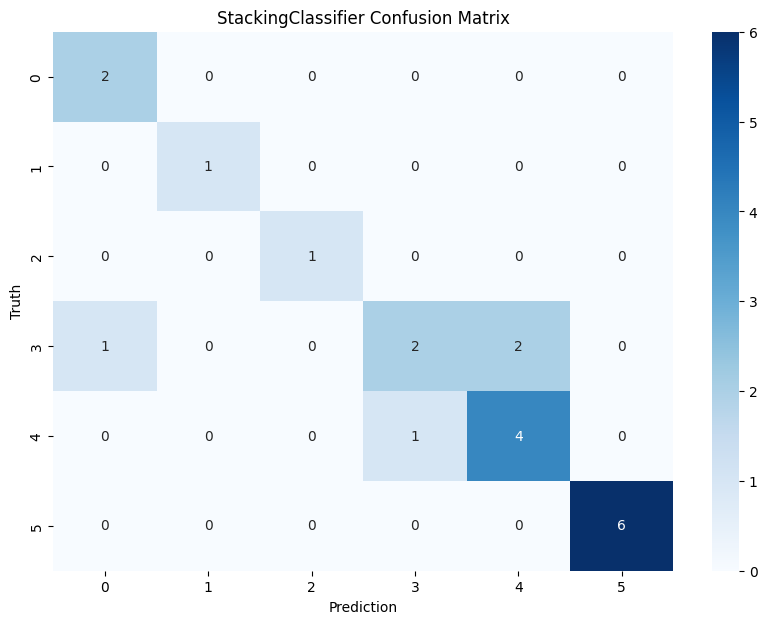

BaggingClassifier_SVC classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



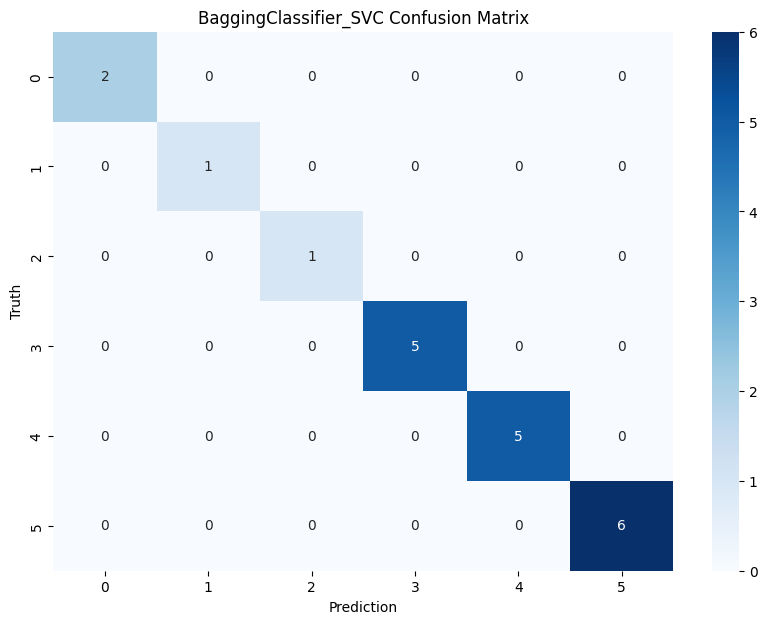

MLPClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       0.50      0.60      0.55         5
         DAP       0.75      0.60      0.67         5
        Urea       0.83      0.83      0.83         6

    accuracy                           0.65        20
   macro avg       0.58      0.50      0.53        20
weighted avg       0.71      0.65      0.67        20



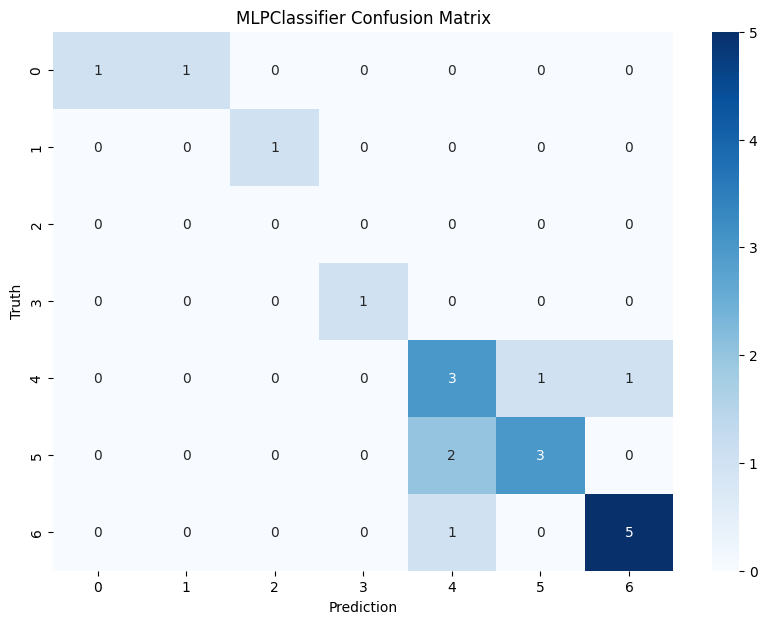

LinearSVC classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      0.60      0.75         5
         DAP       0.83      1.00      0.91         5
        Urea       0.86      1.00      0.92         6

    accuracy                           0.80        20
   macro avg       0.67      0.59      0.61        20
weighted avg       0.87      0.80      0.81        20



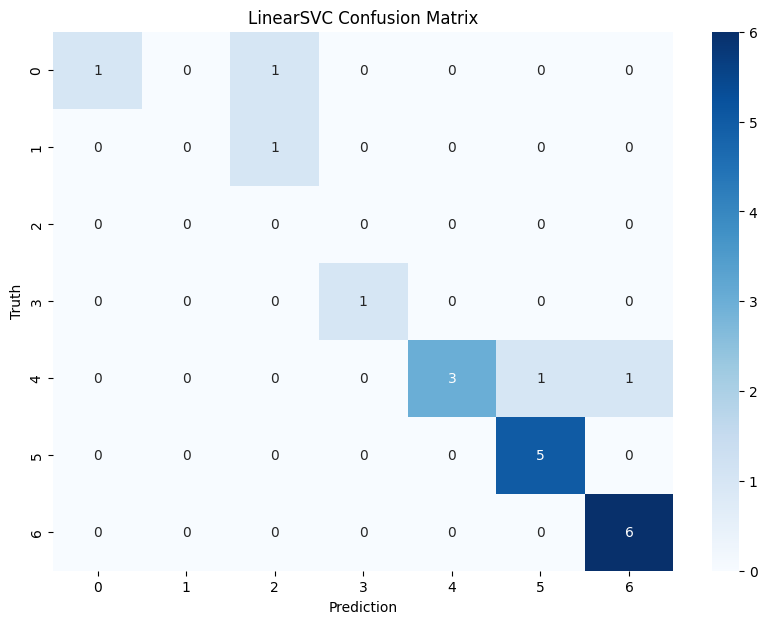

All files saved and zipped in all_models.zip


In [ ]:
# Train and evaluate various models
models = {
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "RidgeClassifier": RidgeClassifier(),
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    "Perceptron": Perceptron(),
    "BaggingClassifier": BaggingClassifier(),
    "HistGradientBoostingClassifier": HistGradientBoostingClassifier(),
    "SGDClassifier": SGDClassifier(),
    "NearestCentroid": NearestCentroid(),
    "K-NeighborsClassifier": KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42),
    "LogisticRegression": LogisticRegression(solver='liblinear',max_iter=1000),
    "SupportVectorClassifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "CatBoostClassifier": CatBoostClassifier(verbose=0),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "LabelPropagation": LabelPropagation(),
    "LabelSpreading": LabelSpreading(),
    "GaussianProcessClassifier": GaussianProcessClassifier(),
    "GaussianNB": GaussianNB(),
    "VotingClassifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('svc', SVC())
    ], voting='hard'),
    "StackingClassifier": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('svc', SVC())
        ], final_estimator=LogisticRegression()
    ),
    "BaggingClassifier_SVC": BaggingClassifier(n_estimators=10),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "LinearSVC": LinearSVC(max_iter=10000),

}

# Create directory if it does not exist
if not os.path.exists('all_models'):
    os.makedirs('all_models')

# Evaluate and save all models
accuracies = {}
for model_name, model in models.items():
    acc = evaluate_and_save_model(model, model_name)
    accuracies[model_name] = acc


zip_path = 'all_models.zip'  # Specify the full path including the .zip filename

with zipfile.ZipFile(zip_path, 'w') as zipf:
    for root, dirs, files in os.walk("working/all_models"):
        for file in files:
            # Preserve the directory structure in the zip file
            zipf.write(os.path.join(root, file),
                       arcname=os.path.relpath(os.path.join(root, file),
                                              "/content/all_models"))
print(f"All files saved and zipped in {zip_path}")

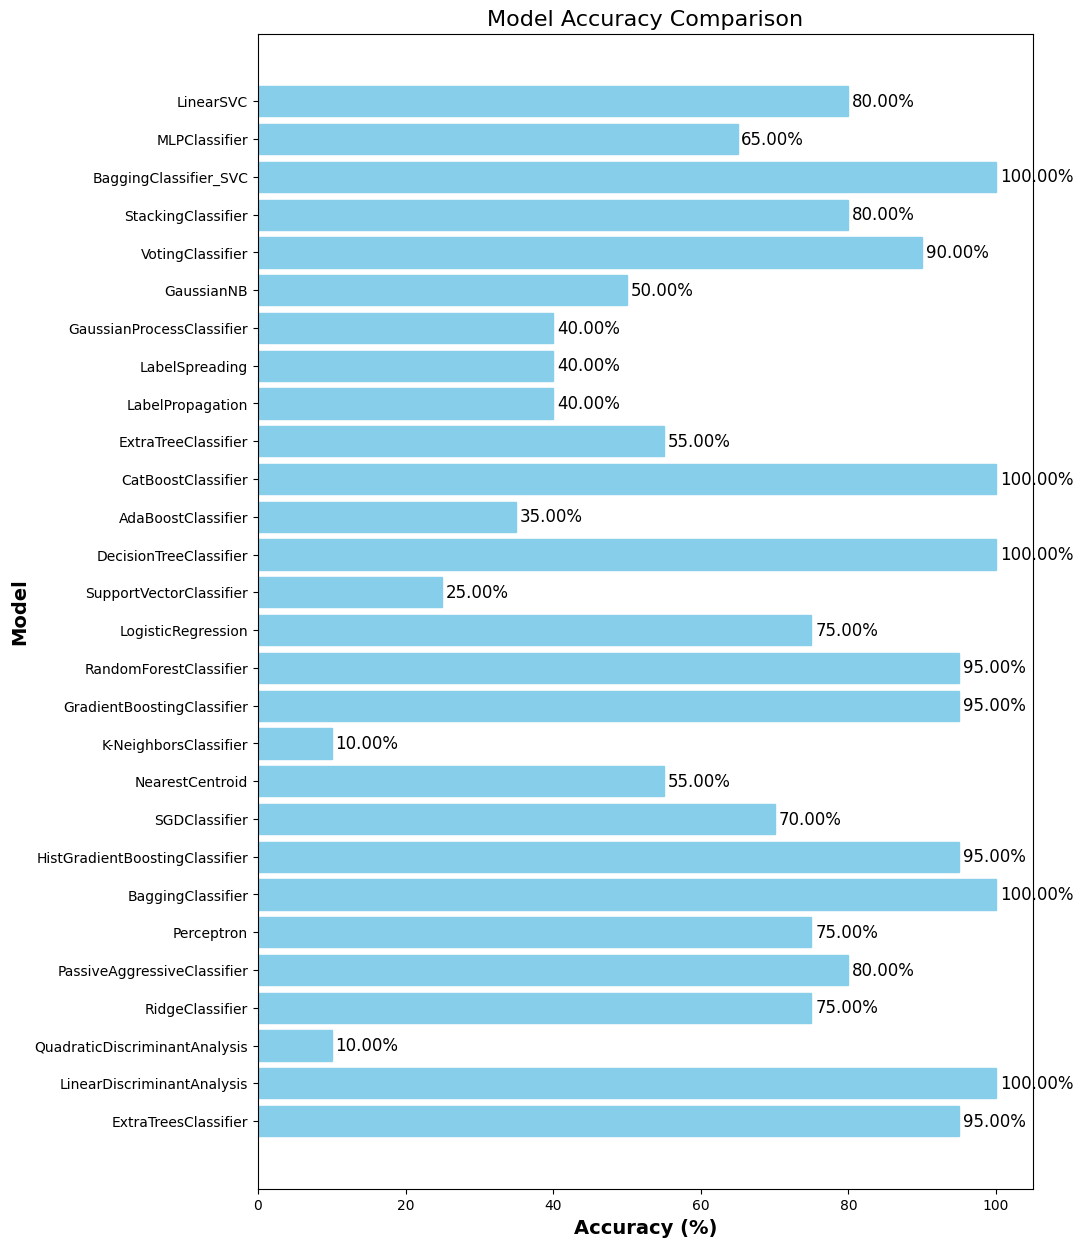

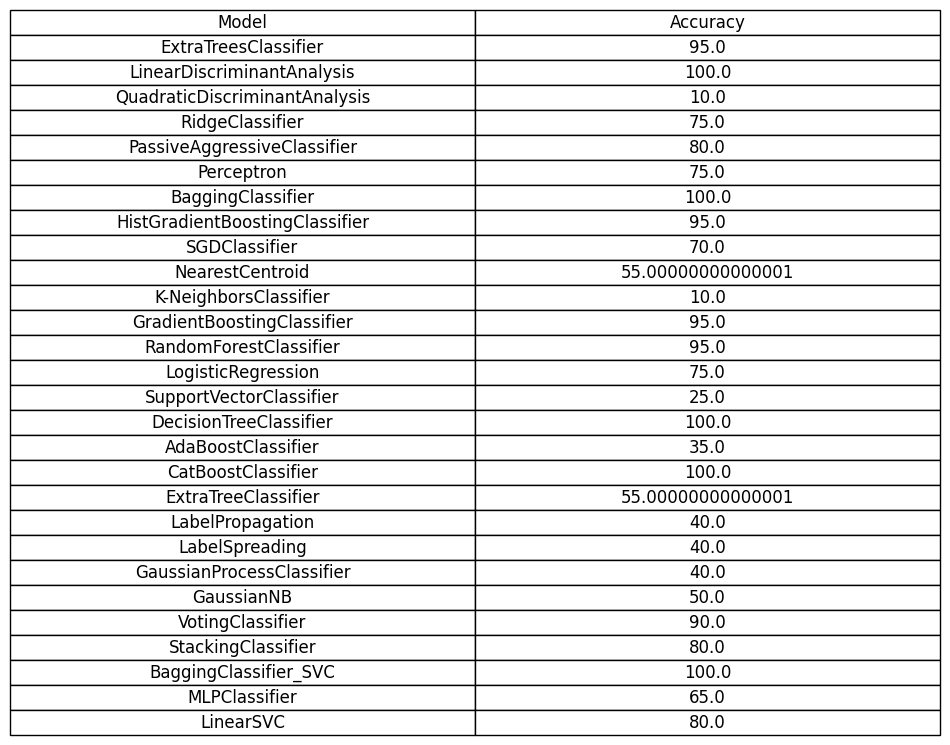

The best model is LinearDiscriminantAnalysis with an accuracy of 100.00%


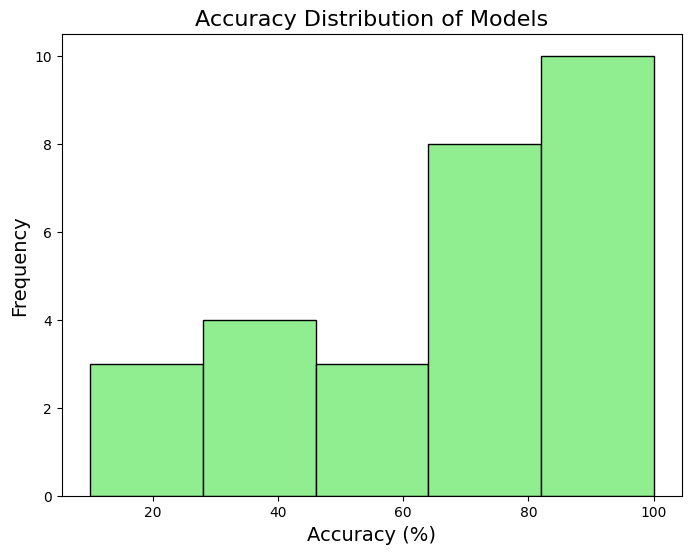

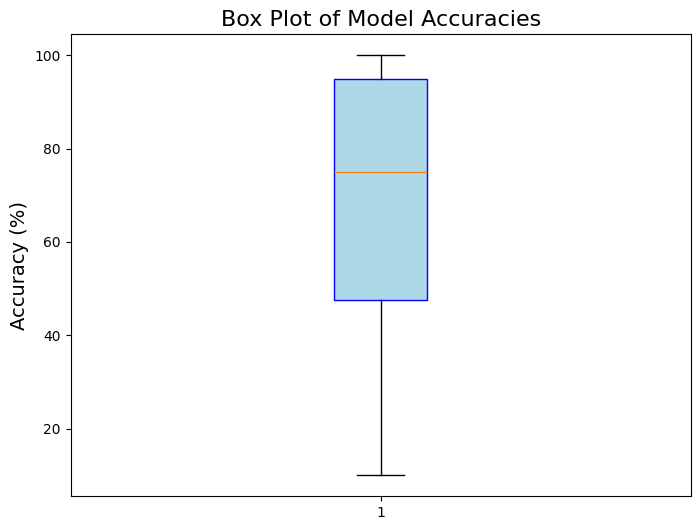

Top 5 models based on accuracy:
                         Model  Accuracy
25       BaggingClassifier_SVC     100.0
17          CatBoostClassifier     100.0
6            BaggingClassifier     100.0
15      DecisionTreeClassifier     100.0
1   LinearDiscriminantAnalysis     100.0


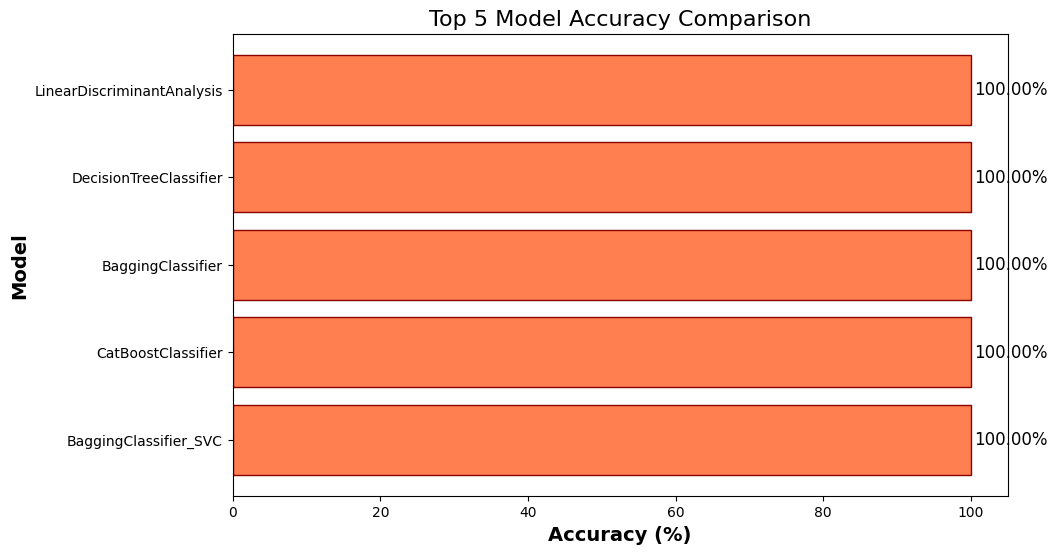

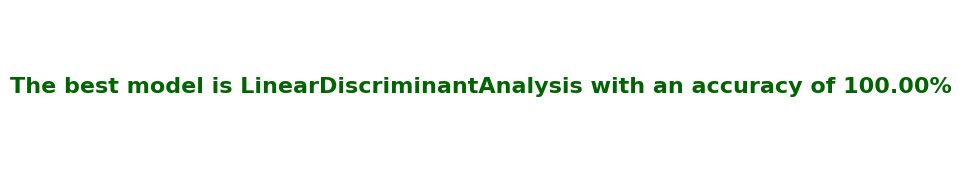

In [ ]:
# Create a DataFrame for model comparison
model_comparison_table = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
model_comparison_table['Accuracy'] = model_comparison_table['Accuracy'] * 100  # Convert to percentage

# Save the DataFrame as a CSV file
model_comparison_table.to_csv("Model_Accuracy_Comparison.csv", index=False)

# Plotting the horizontal bar chart with larger height and bold model names
fig, ax = plt.subplots(figsize=(10, 15))
bars = ax.barh(model_comparison_table['Model'], model_comparison_table['Accuracy'], color='skyblue', edgecolor='skyblue')
ax.set_xlabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Model', fontsize=14, fontweight='bold')
ax.set_title('Model Accuracy Comparison', fontsize=16)

# Display accuracies on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.2f}%", ha='left', va='center', fontsize=12)

# Save the horizontal bar chart
plt.savefig("Model_Accuracy_Comparison_BarChart.png", bbox_inches='tight')
plt.show()

# Plotting the table separately
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table_data = model_comparison_table.values
table = ax.table(cellText=table_data, colLabels=model_comparison_table.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Save the table plot
plt.savefig("Model_Accuracy_Comparison_Table.png", bbox_inches='tight')
plt.show()

# Determine the best model
best_model_name = model_comparison_table.loc[model_comparison_table['Accuracy'].idxmax(), 'Model']
best_model_accuracy = model_comparison_table['Accuracy'].max()
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}%")

# Plot accuracy distribution (histogram) to visualize spread
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(model_comparison_table['Accuracy'], bins=5, color='lightgreen', edgecolor='black')
ax.set_title("Accuracy Distribution of Models", fontsize=16)
ax.set_xlabel("Accuracy (%)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

# Save the histogram plot
plt.savefig("Model_Accuracy_Distribution.png", bbox_inches='tight')
plt.show()

# Box plot for accuracy spread
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(model_comparison_table['Accuracy'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
ax.set_title("Box Plot of Model Accuracies", fontsize=16)
ax.set_ylabel("Accuracy (%)", fontsize=14)

# Save the box plot
plt.savefig("Model_Accuracy_BoxPlot.png", bbox_inches='tight')
plt.show()

# Sort the DataFrame by accuracy in descending order and get the top five models
top_five_models = model_comparison_table.sort_values(by='Accuracy', ascending=False).head(5)
print("Top 5 models based on accuracy:")
print(top_five_models)

# Display top five models in a separate plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_five_models['Model'], top_five_models['Accuracy'], color='coral', edgecolor='darkred')
ax.set_xlabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Model', fontsize=14, fontweight='bold')
ax.set_title('Top 5 Model Accuracy Comparison', fontsize=16)

# Display accuracies on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.2f}%", ha='left', va='center', fontsize=12)

# Save the top five models chart
plt.savefig("Top_5_Model_Accuracy_Comparison_BarChart.png", bbox_inches='tight')
plt.show()


# Final Decision Plot
fig, ax = plt.subplots(figsize=(10, 2))
ax.text(0.5, 0.5, f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}%",
        ha='center', va='center', fontsize=16, fontweight='bold', color='darkgreen')
ax.axis('off')

# Save the final decision plot
plt.savefig("Model_Final_Decision.png", bbox_inches='tight')
plt.show()